In [2]:
import numpy as np
import networkx as nx
import random as ra
import matplotlib.pyplot as plt
import math

# Parameters of figures

from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

# Start creating a graph

g = nx.Graph()

for i in range(10):
    g.add_node(i)
        
for i in range(4):
    for j in range(5):
        g.add_edge(i,j+4)

        
print (g.nodes())
print (g.edges())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[(0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8)]


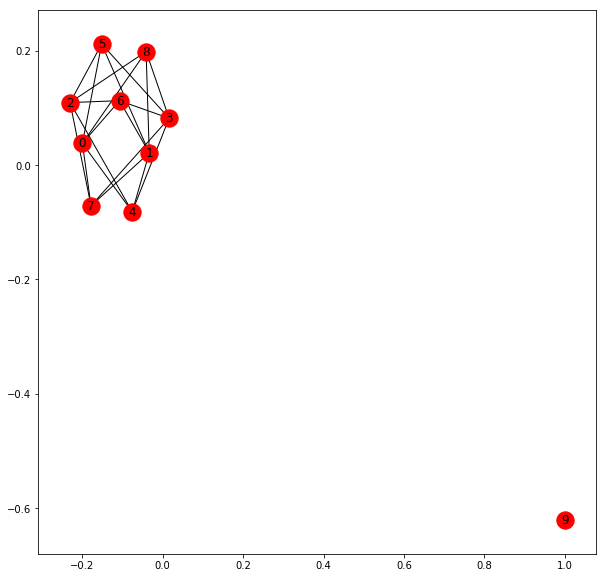

In [3]:
nx.draw_networkx(g)
plt.show()

In [4]:

# print some information of the graph    

for node in g.nodes():
    print(node,g.degree(node))



0 5
1 5
2 5
3 5
4 4
5 4
6 4
7 4
8 4
9 0


In [4]:

# If we remove a node, and add it back, its edges disappeared

g.remove_node(7)
g.add_node(7)

for node in g.nodes():
    print(node,g.degree(node))
    


0 4
1 4
2 4
3 4
4 4
5 4
6 4
8 4
9 0
7 0


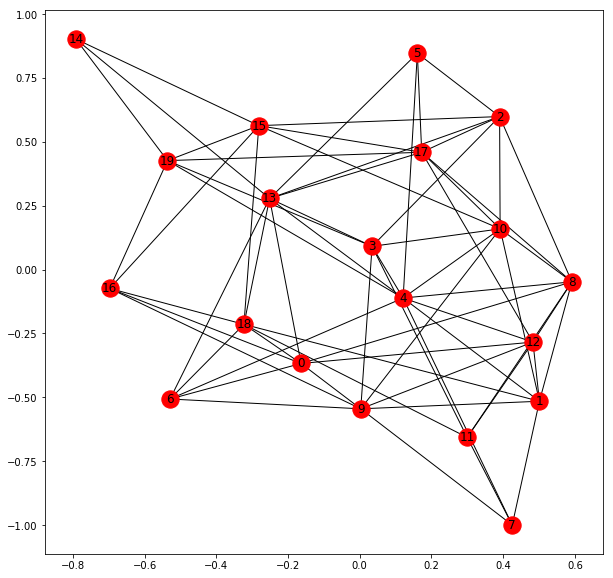

In [27]:
# create and print a random graph with edge attributes

g.clear()

for i in range(20):
    g.add_node(i)
    
for i in range(100):
    a = ra.randint(0,19)
    b = ra.randint(0,19)
    g.add_edge(a,b, weight=1)
    
nx.draw_networkx(g)
plt.show()




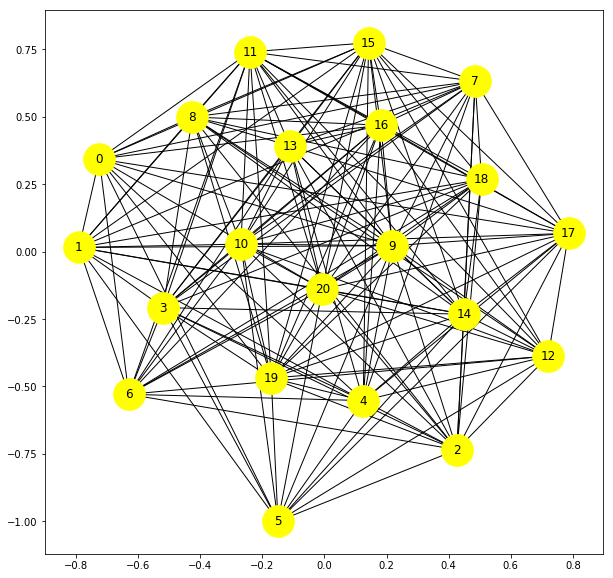

In [15]:
# the same graph, but we change the printing parameters

nx.draw_networkx(g,node_size=1000,node_color="yellow")
plt.show()





[(0, 5), (0, 14), (0, 15), (0, 13), (0, 10), (0, 7), (1, 2), (1, 15), (1, 14), (1, 9), (1, 10), (1, 19), (2, 10), (2, 19), (2, 2), (2, 12), (2, 8), (2, 14), (2, 17), (3, 11), (3, 14), (3, 18), (3, 13), (3, 19), (3, 10), (4, 12), (4, 19), (4, 15), (4, 8), (4, 6), (5, 10), (5, 14), (5, 9), (5, 8), (6, 16), (6, 18), (6, 8), (6, 19), (6, 9), (6, 17), (7, 15), (7, 14), (7, 12), (7, 19), (7, 18), (7, 9), (7, 17), (8, 16), (8, 11), (8, 14), (9, 14), (9, 11), (9, 10), (9, 9), (9, 16), (9, 18), (10, 14), (10, 12), (10, 18), (11, 11), (11, 13), (11, 17), (11, 12), (12, 19), (13, 14), (13, 19), (14, 16), (14, 17), (14, 19), (15, 15), (15, 16), (16, 18), (16, 16), (16, 19), (16, 17), (17, 19), (19, 19)]


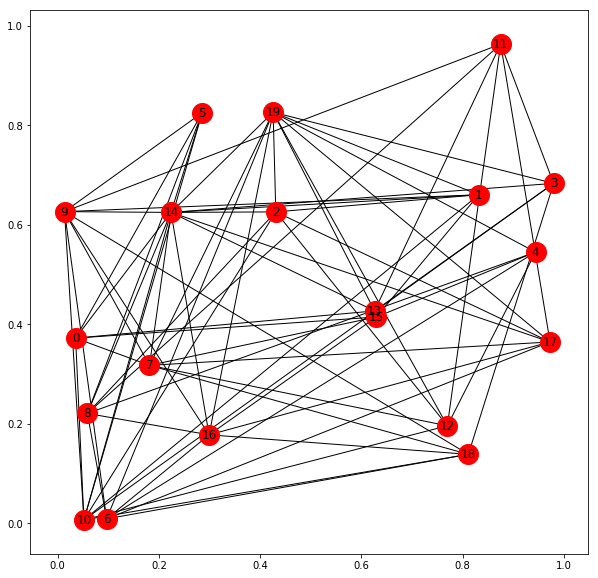

In [28]:
# create a new random graph, assign random positions to points on the plane, and then print nodes with those positions

g.clear() 

# we create an empty dictionary pos. for each node i, pos[i] is a 2-dim array denoting the position of the point in the plane

pos={}

for i in range(20):
        x=np.random.random_sample() # randomly sample from [0,1)
        y=np.random.random_sample()
        g.add_node(i)#,x=x,y=y)
        pos[i]=(x,y)     # coordinates for drawing

        
for i in range(100):
    a = ra.randint(0,19)
    b = ra.randint(0,19)
    g.add_edge(a,b)


print (g.edges())

nx.draw_networkx(g,pos,node_size=400)

plt.show()

    



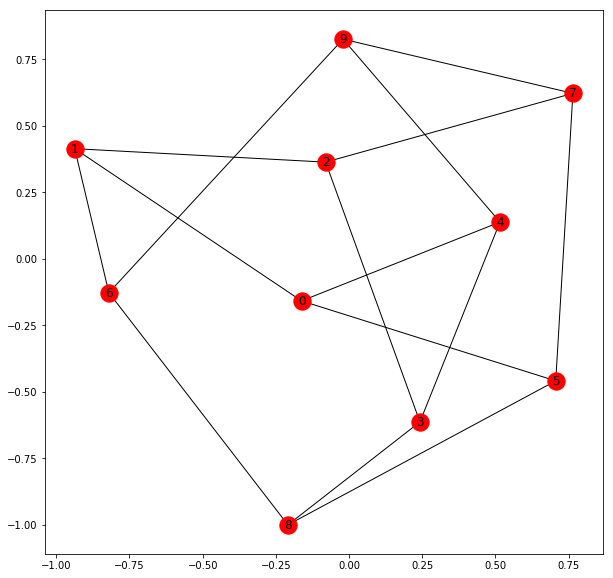

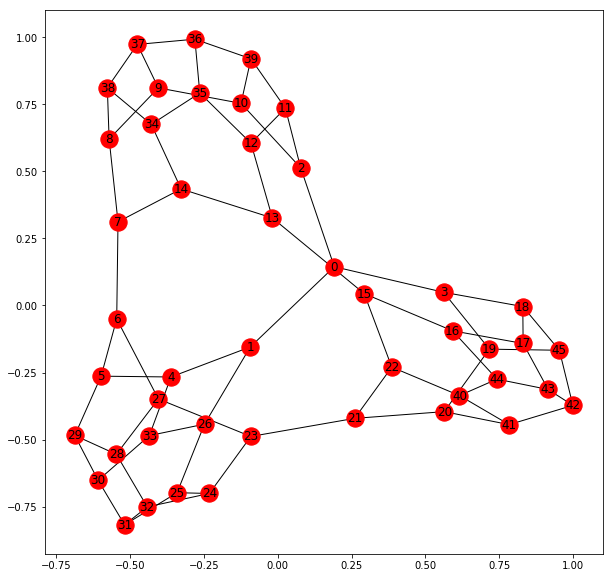

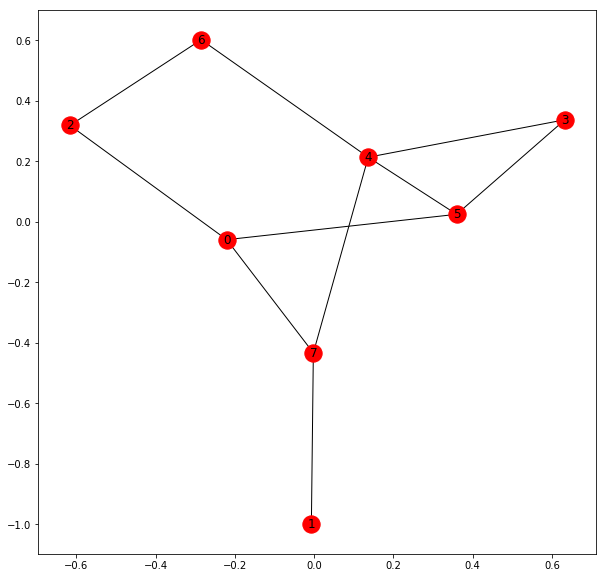

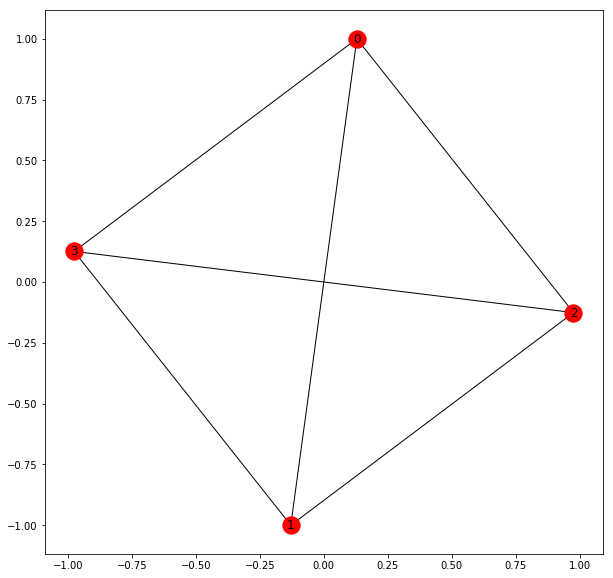

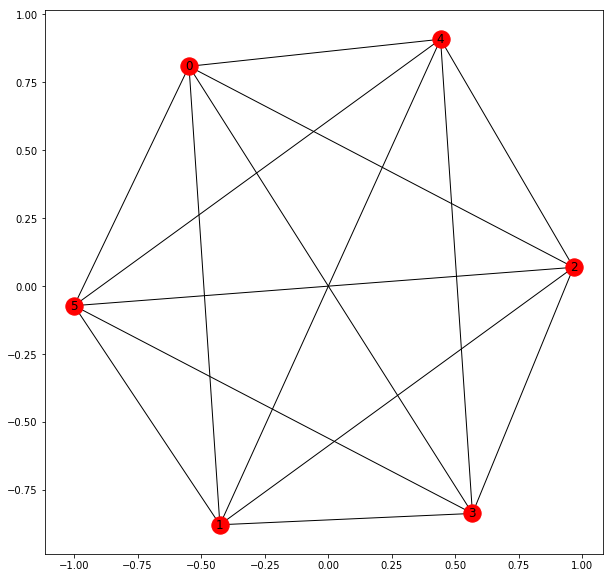

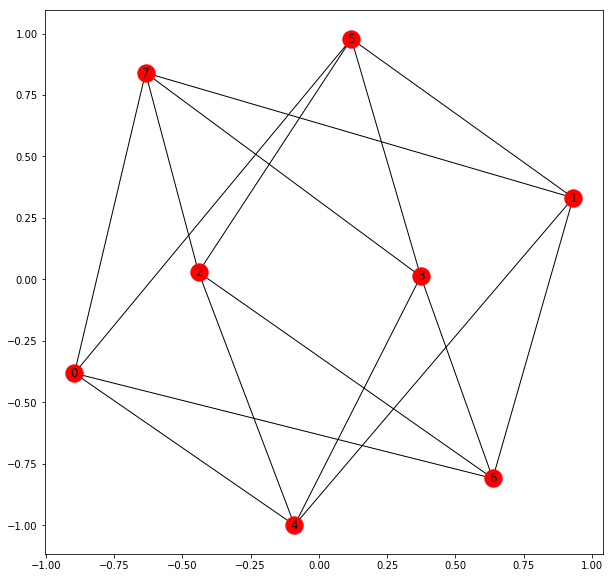

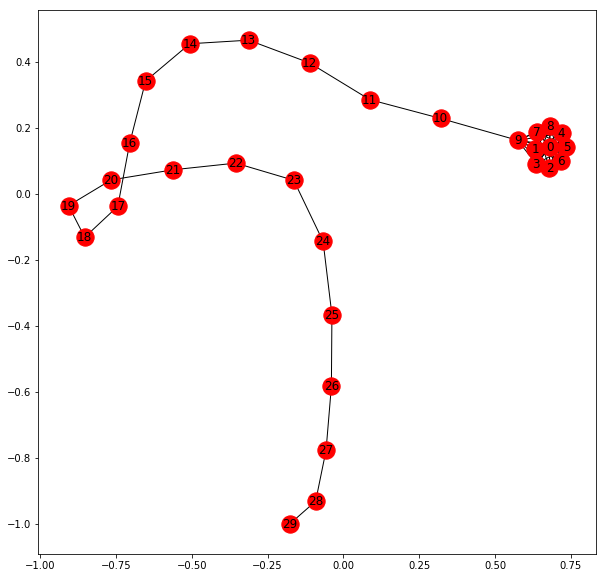

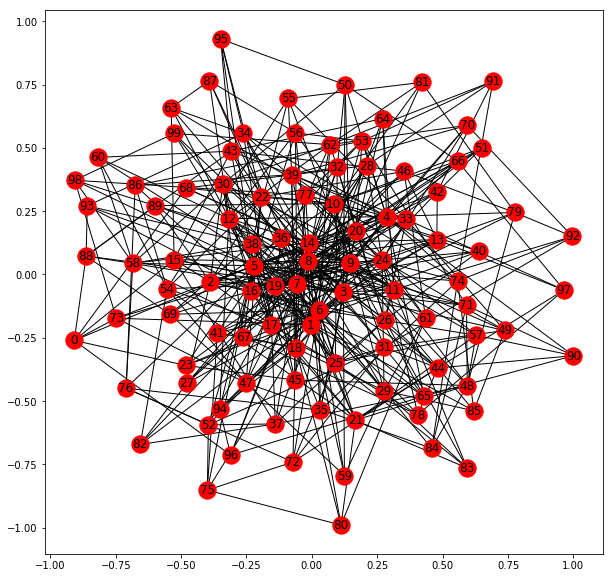

In [31]:
# create and print special graphs

# classical graphs

petersen=nx.petersen_graph()
tutte=nx.tutte_graph()
maze=nx.sedgewick_maze_graph()
tetha=nx.tetrahedral_graph()
K6=nx.complete_graph(6)
K44=nx.complete_bipartite_graph(4,4)
lolli=nx.lollipop_graph(10,20)

# two models of random graphs

# In the Erdos-Renyi model, each edge has the same probability of appearing 
# In this example, we have 100 nodes and each edge appears with probability 15 % 

gn=nx.gnp_random_graph(100,0.15) 

# The Barabasi-Albert model has a "richer get richer" behaviour
# nodes are added one at the time, and will connect with higher probability to nodes that have already many neighbors
# very used to model e.g. social networks
# In this example, we start with 5 nodes. The remaining 95 appear one at a time, and each of them is connected 
# to 5 already present nodes randomly, with the probability proportional to the degree of the nodes 


ba=nx.barabasi_albert_graph(100,5) # starting from a graph with 5 nodes and no edges, adds 95 remaining nodes one by one, each time connecting 


nx.draw_networkx(petersen)
plt.show()

nx.draw_networkx(tutte)
plt.show()

nx.draw_networkx(maze)
plt.show()

nx.draw_networkx(tetha)
plt.show()

nx.draw_networkx(K6)
plt.show()

nx.draw_networkx(K44)
plt.show()

nx.draw_networkx(lolli)
plt.show()

nx.draw_networkx(ba)
plt.show()




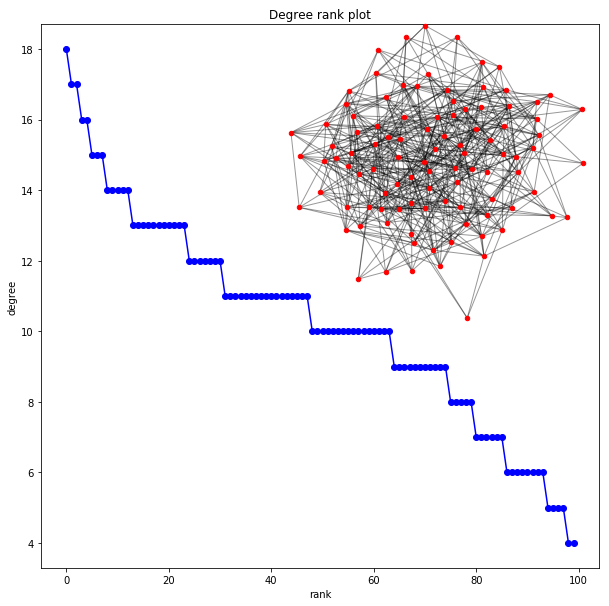

the maximum degree is 18, while the minimum is 4, and the number of edges is 515


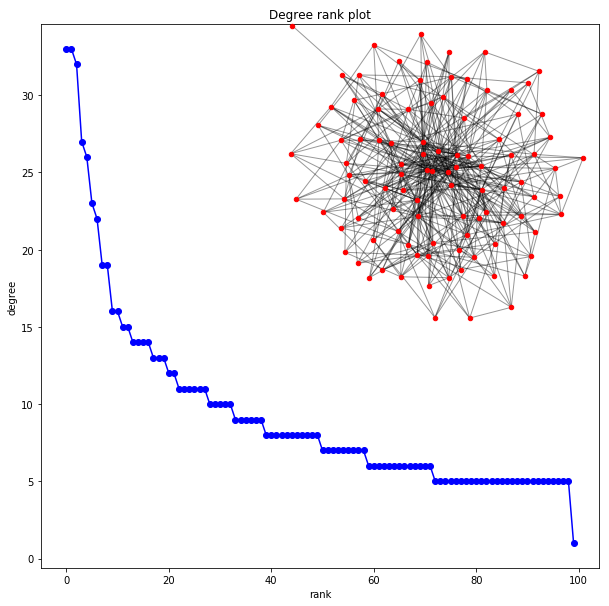

the maximum degree is 33, while the minimum is 1, and the number of edges is 475


In [41]:
# create random graph à la Erdos-Renyi. Print the (sorted) degree sequence. Then do the same for a graph à la Barabasi

# Modification of an example taken from networkx.github.io, authored by Aric Hagberg -- aric.hagberg@gmail.com

G = nx.gnp_random_graph(100, 0.1)

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
dmax = max(degree_sequence)
dmin = min(degree_sequence)

plt.plot(degree_sequence, 'b-', marker='o') # logarithmic scale on both axis
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")

# draw graph in inset

plt.axes([0.45, 0.45, 0.45, 0.45])
pos = nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.4) # alpha denotes the edge transparency




plt.show()

print("the maximum degree is %s, while the minimum is %s, and the number of edges is %s" % (dmax, dmin, G.number_of_edges()))

G.clear()

G = nx.barabasi_albert_graph(100, 5)

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
dmax = max(degree_sequence)
dmin = min(degree_sequence)

plt.plot(degree_sequence, 'b-', marker='o') # logarithmic scale on both axis
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")

# draw graph in inset

plt.axes([0.45, 0.45, 0.45, 0.45])
pos = nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.4) # alpha denotes the edge transparency



plt.show()

print("the maximum degree is %s, while the minimum is %s, and the number of edges is %s" % (dmax, dmin, G.number_of_edges()))




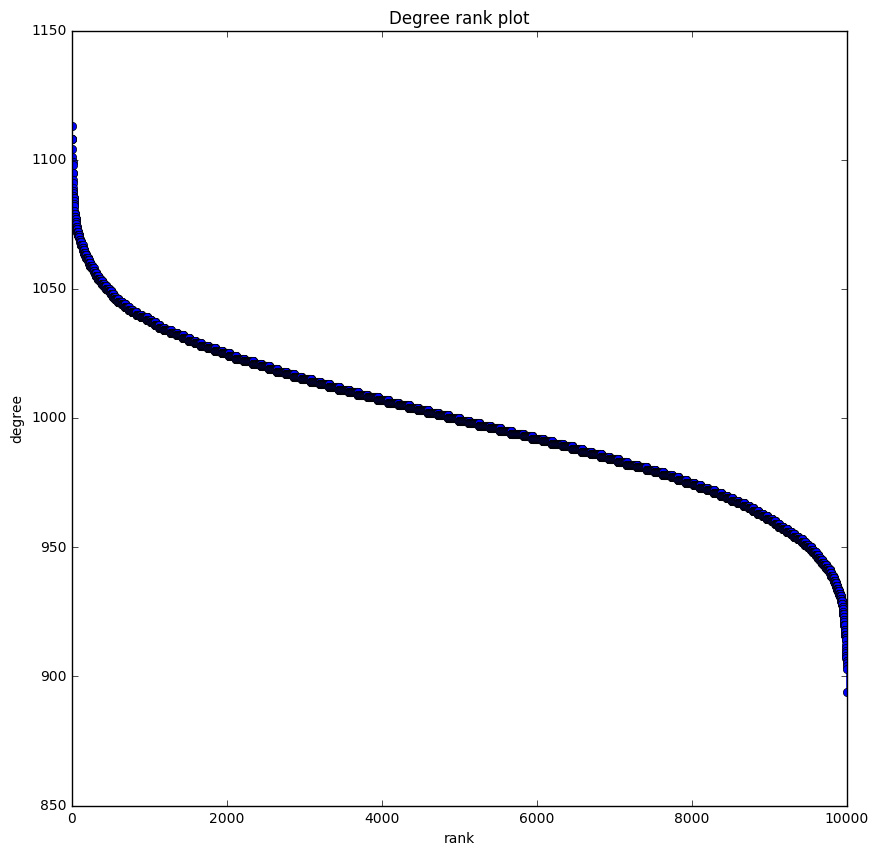

the maximum degree is 1113, while the minimum is 894, and the number of edges is 4998179


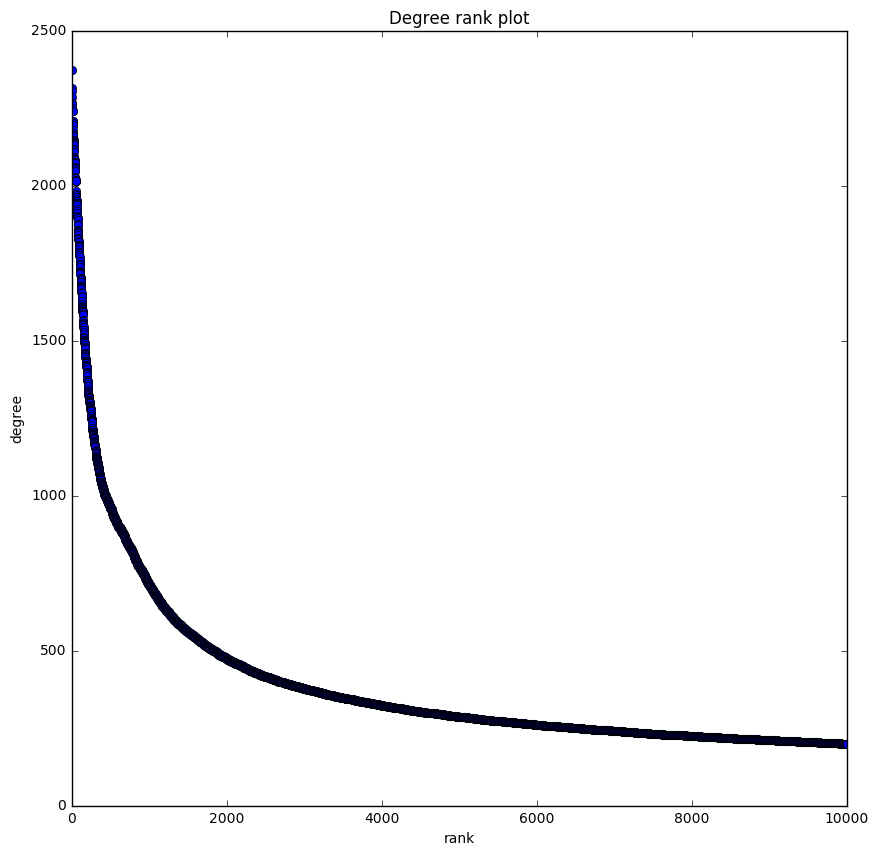

the maximum degree is 2374, while the minimum is 200, and the number of edges is 1960000


In [154]:
# same degree sequences as above, but for much larger graphs 

G = nx.gnp_random_graph(10000, 0.1)

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
dmax = max(degree_sequence)
dmin = min(degree_sequence)

plt.plot(degree_sequence, 'b-', marker='o') # logarithmic scale on both axis
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")


plt.show()

print("the maximum degree is %s, while the minimum is %s, and the number of edges is %s" % (dmax, dmin, G.number_of_edges()))

G.clear()

G = nx.barabasi_albert_graph(10000, 200)

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
dmax = max(degree_sequence)
dmin = min(degree_sequence)

plt.plot(degree_sequence, 'b-', marker='o') # logarithmic scale on both axis
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")

plt.show()

print("the maximum degree is %s, while the minimum is %s, and the number of edges is %s" % (dmax, dmin, G.number_of_edges()))


Loaded miles_dat.txt containing 128 cities.
digraph has 128 nodes with 8128 edges


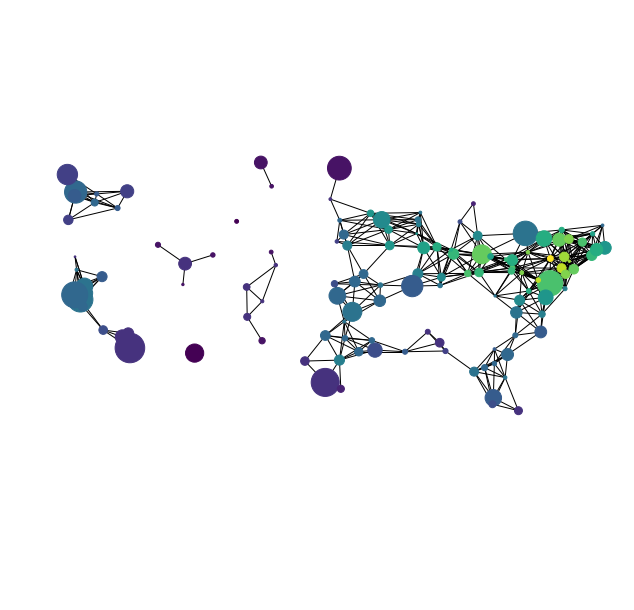

In [21]:
# Example of how to create a graph from data. Taken with some modifications from  networkx.github.io
# 128 cities in the US, recorded as: name, position, population, distance to the previous city 
# Each city is a circle, with diameter proportional to the population
# edges are between close cities

# Author: Aric Hagberg (hagberg@lanl.gov)

#    Copyright (C) 2004-2018 by
#    Aric Hagberg <hagberg@lanl.gov>
#    Dan Schult <dschult@colgate.edu>
#    Pieter Swart <swart@lanl.gov>
#    All rights reserved.
#    BSD license.

import re
import sys

import matplotlib.pyplot as plt


def miles_graph():
    """ Return the cites example graph in miles_dat.txt
        from the Stanford GraphBase.
    """

# open the zip file    

    import gzip
    fh = gzip.open('knuth_miles.txt.gz', 'r')

    G = nx.Graph() # G is used to store all informations: name of the cities, population, distances, etc.
    G.position = {} #dictionary of position in the map
    G.population = {} # dictionary on population

    cities = []
    for line in fh.readlines():
        line = line.decode()
        if line.startswith("*"):  # skip comments
            continue

        numfind = re.compile("^\d+")

        if numfind.match(line):  # this line is distances
            dist = line.split() # records all distances in an array
            for d in dist:
                G.add_edge(city, cities[i], weight=int(d))
                i = i + 1
        else:  # this line is a city, position, population
            i = 1
            (city, coordpop) = line.split("[") # records the name of the city and the pair (coordinate, population)
            cities.insert(0, city)
            (coord, pop) = coordpop.split("]") # separate coordinates from population 
            (y, x) = coord.split(",") # separate x and y component

            G.add_node(city)
            G.position[city] = (-int(x) + 7500, int(y) - 3000)
            G.population[city] = float(pop) / 1000.0
    return G


if __name__ == '__main__':

    G = miles_graph()

    print("Loaded miles_dat.txt containing 128 cities.")
    print("digraph has %d nodes with %d edges"
          % (nx.number_of_nodes(G), nx.number_of_edges(G)))

    # make new graph of cites, edge if less then 300 miles between them
    H = nx.Graph()
    for v in G:
        H.add_node(v)
    for (u, v, d) in G.edges(data=True):
        if d['weight'] < 300:
            H.add_edge(u, v)

    # draw with matplotlib/pylab
    plt.figure(figsize=(8, 8))
    # with nodes colored by degree sized by population
    node_color = [float(H.degree(v)) for v in H]
    nx.draw(H, G.position,
            node_size=[G.population[v] for v in H],
            node_color=node_color,
            with_labels=False)

    # scale the axes equally
    plt.xlim(-5000, 500)
    plt.ylim(-2000, 3500)

    plt.show()
    
miles_graph()